In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("SUD_DATA.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull()

In [29]:
df.dropna(inplace=True)

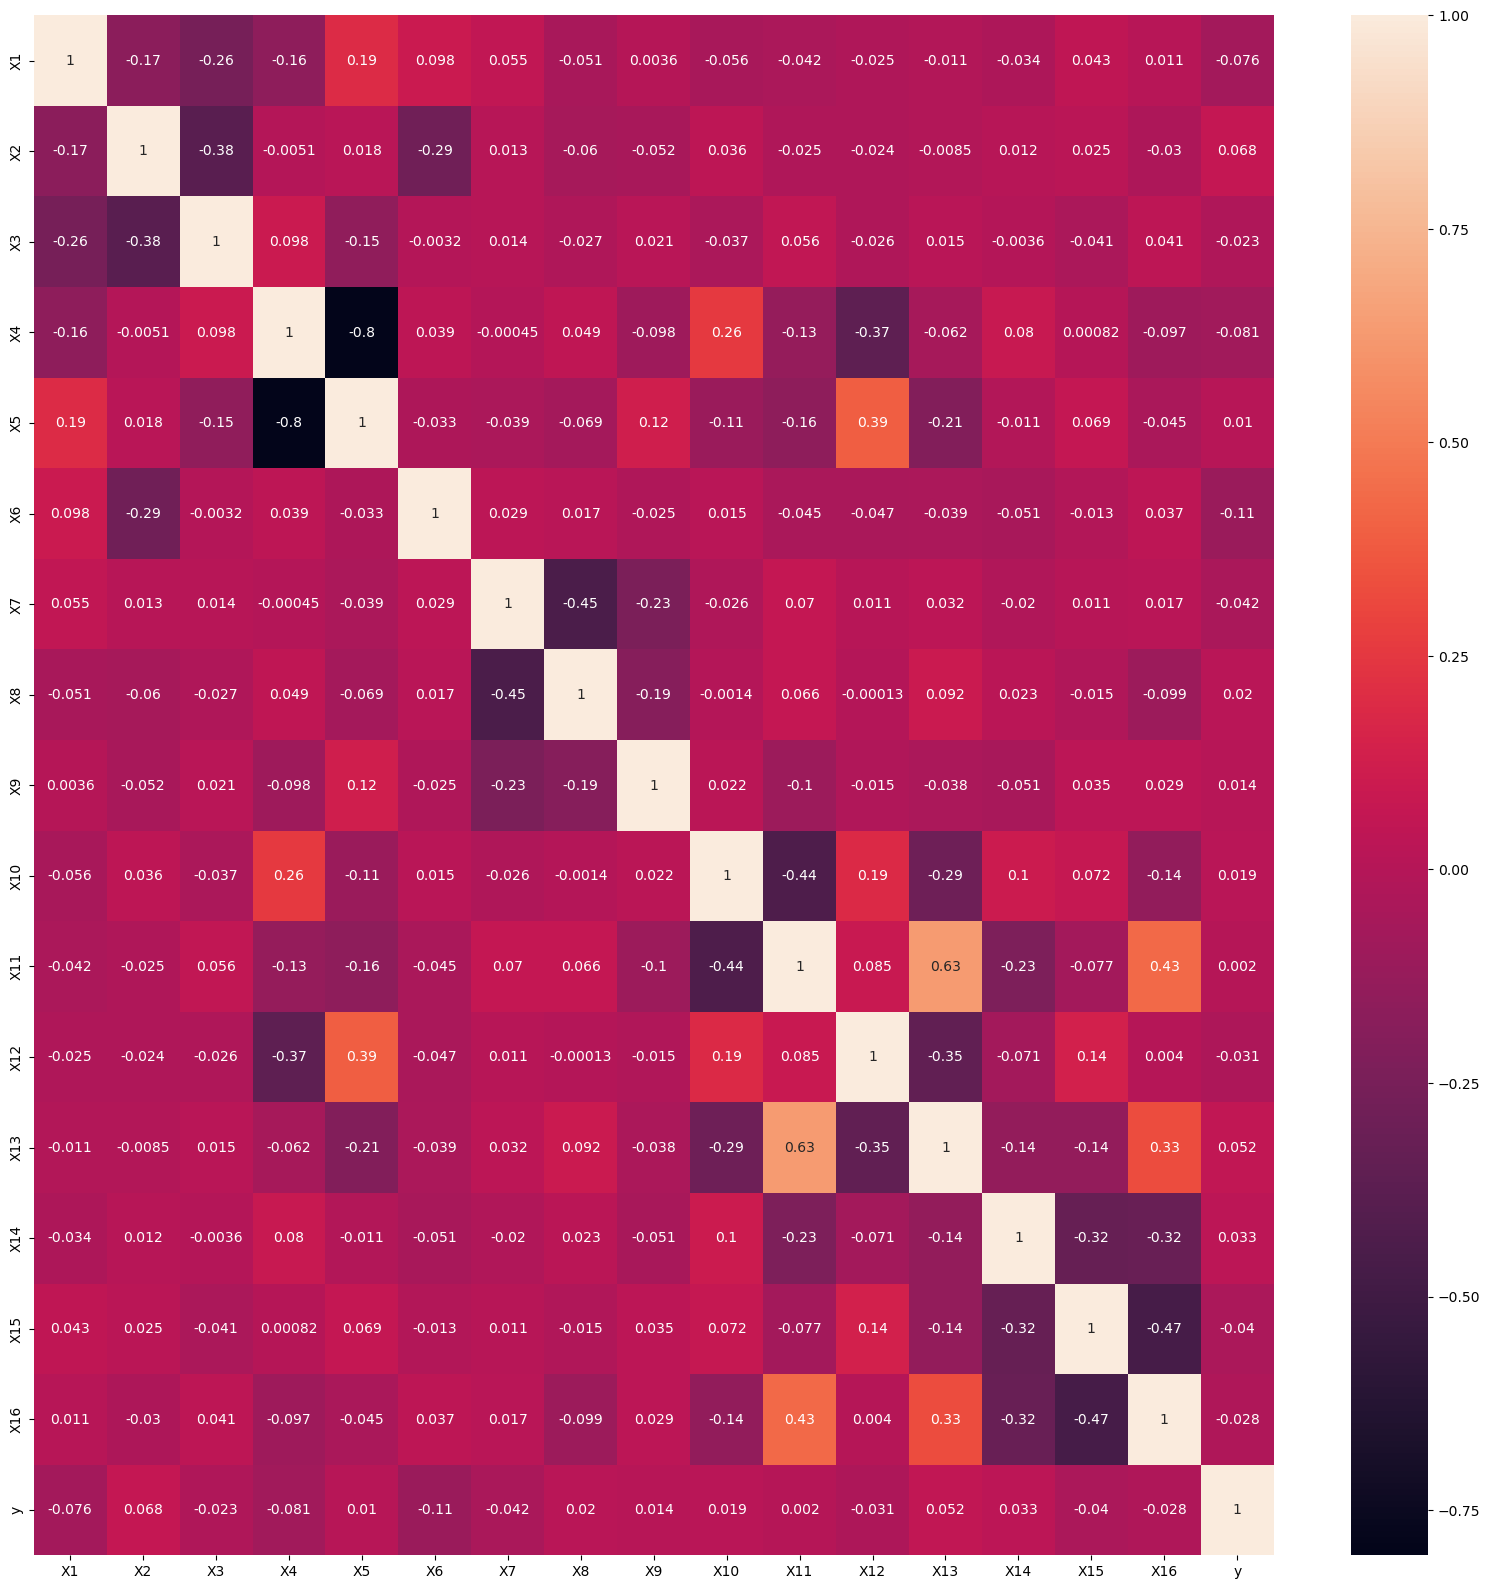

In [30]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

C:\Users\anand\anaconda3\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


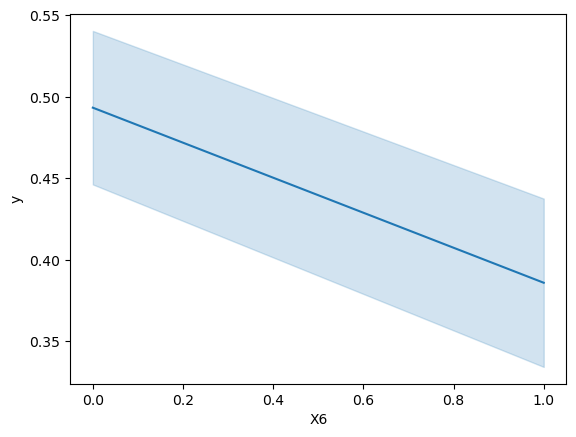

In [31]:
sns.lineplot(df['X6'], df['y'])
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1), 
                                                    df['y'], test_size=0.30, 
                                                    random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       144
           1       0.46      0.44      0.45       101

    accuracy                           0.56       245
   macro avg       0.54      0.54      0.54       245
weighted avg       0.56      0.56      0.56       245



In [39]:
from sklearn import metrics

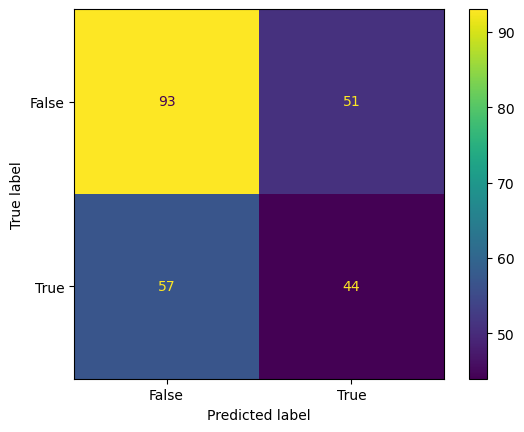

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [90]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters=3)

In [92]:
kmeans.fit(df.drop('y',axis=1))

KMeans(n_clusters=3)

In [93]:
kmeans.cluster_centers_

array([[ 1.56962025e-01,  2.07594937e-01,  3.16455696e-01,
        -1.66533454e-16,  9.97468354e-01,  4.43037975e-01,
         3.26582278e-01,  2.35443038e-01,  1.29113924e-01,
         3.06329114e-01,  8.35443038e-02,  5.41772152e-01,
        -6.10622664e-16,  2.15189873e-01,  4.02531646e-01,
         1.69620253e-01],
       [ 1.91387560e-02,  2.05741627e-01,  4.25837321e-01,
         9.90430622e-01,  2.22044605e-16,  4.73684211e-01,
         3.39712919e-01,  2.91866029e-01,  5.26315789e-02,
         5.45454545e-01,  8.13397129e-02,  6.69856459e-02,
         3.82775120e-02,  2.58373206e-01,  3.49282297e-01,
         1.57894737e-01],
       [ 8.57142857e-02,  1.76190476e-01,  4.09523810e-01,
         1.80952381e-01,  4.47619048e-01,  4.47619048e-01,
         4.09523810e-01,  3.09523810e-01,  6.19047619e-02,
        -1.11022302e-16,  1.00000000e+00,  2.95238095e-01,
         6.57142857e-01,  4.28571429e-02,  1.42857143e-01,
         7.57142857e-01]])

In [94]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['y'],kmeans.labels_))
print(classification_report(df['y'],kmeans.labels_))



[[223 119 110]
 [172  90 100]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.56      0.49      0.53       452
           1       0.43      0.25      0.32       362
           2       0.00      0.00      0.00         0

    accuracy                           0.38       814
   macro avg       0.33      0.25      0.28       814
weighted avg       0.50      0.38      0.43       814



C:\Users\anand\anaconda3\ananconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand\anaconda3\ananconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anand\anaconda3\ananconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbor 

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
scaler.fit(df.drop('y',axis=1))

StandardScaler()

In [98]:
scaled_features = scaler.transform(df.drop('y',axis=1))

In [99]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,-0.339217,-0.498464,1.308944,1.523958,-1.223492,-0.908357,1.358732,-0.606685,-0.318573,-0.637081,-0.685065,-0.743932,-0.467507,-0.471405,1.451506,-0.68313
1,-0.339217,-0.498464,1.308944,1.523958,-1.223492,-0.908357,-0.735980,-0.606685,-0.318573,1.569659,-0.685065,-0.743932,-0.467507,-0.471405,-0.688940,-0.68313
2,-0.339217,-0.498464,1.308944,1.523958,-1.223492,-0.908357,-0.735980,1.648301,-0.318573,-0.637081,-0.685065,-0.743932,-0.467507,-0.471405,-0.688940,-0.68313
3,-0.339217,-0.498464,1.308944,1.523958,-1.223492,-0.908357,-0.735980,-0.606685,-0.318573,-0.637081,-0.685065,-0.743932,-0.467507,-0.471405,1.451506,-0.68313
4,-0.339217,-0.498464,1.308944,1.523958,-1.223492,-0.908357,-0.735980,-0.606685,-0.318573,-0.637081,-0.685065,-0.743932,-0.467507,-0.471405,1.451506,-0.68313


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['y'],
                                                    test_size=0.30)

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn = KNeighborsClassifier(n_neighbors=6)

In [140]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [141]:
pred = knn.predict(X_test)

C:\Users\anand\anaconda3\ananconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [142]:
from sklearn.metrics import classification_report,confusion_matrix

In [143]:
print(confusion_matrix(y_test,pred))

[[107  34]
 [ 90  14]]


In [144]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.76      0.63       141
           1       0.29      0.13      0.18       104

    accuracy                           0.49       245
   macro avg       0.42      0.45      0.41       245
weighted avg       0.44      0.49      0.44       245



USING XGBOOST ALGORITHM

In [84]:
import xgboost as xg

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.metrics import mean_squared_error as MSE

In [87]:
train_X, test_X, train_y, test_y = train_test_split(scaled_features,df['y'],
                      test_size = 0.3, random_state = 123)

In [88]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [89]:
xgb_r.fit(train_X, train_y)

[23:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [90]:
pred = xgb_r.predict(test_X)

In [91]:
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.551441
